Installing Important Libraries for EDA

In [50]:
#!pip install pandas
#!pip install numpy
#!pip install scipy
#!pip install seaborn
#!pip install plotly

Importing Fundamental Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
import plotly.express as px
import os

In [18]:
print(os.listdir())

['.git', '.github', '.gitignore', '.venv', 'data', 'LICENSE', 'notebooks', 'README.md', 'requirements.txt']


In [15]:
os.chdir("..")  # Go up a directory
print(os.getcwd())

c:\Users\AddisIT\solar-challenge-week1


In [21]:
print(os.getcwd())

c:\Users\AddisIT\solar-challenge-week1


Load Dataset

In [23]:
df  = pd.read_csv('data/benin-malanville.csv', parse_dates=["Timestamp"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

# Summary Statistics & Missing-Value Report

In [21]:
# Overview of numeric columns
print("The Description of the numeric columns:")
print(df.describe().T)

The Description of the numeric columns:
                  count                           mean                  min  \
Timestamp        525600  2022-02-07 12:00:30.000000512  2021-08-09 00:01:00   
GHI            525600.0                     240.559452                -12.9   
DNI            525600.0                     167.187516                 -7.8   
DHI            525600.0                     115.358961                -12.6   
ModA           525600.0                     236.589496                  0.0   
ModB           525600.0                     228.883576                  0.0   
Tamb           525600.0                      28.179683                 11.0   
RH             525600.0                      54.487969                  2.1   
WS             525600.0                       2.121113                  0.0   
WSgust         525600.0                       2.809195                  0.0   
WSstdev        525600.0                        0.47339                  0.0   
WD          

In [26]:
# Overview of all columns
print("---------------------------------")
print("The Description of all columns:")
print(df.describe(include='all'))

# Check for missing values
print("----------------------------------")
print("Check for missing values:")
print(df.isna().sum()/len(df)*100)

---------------------------------
The Description of all columns:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       

In [27]:
# Missing values
null_report = df.isna().sum()
null_report[null_report > 0]

# Flagging columns with >5% nulls
threshold = 0.05 * len(df)
null_report[null_report > threshold]

Comments    525600
dtype: int64

# Outlier Detection & Basic Cleaning

In [37]:
# Columns of interest
cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Compute Z-scores
z_scores = df[cols].apply(zscore)
outliers = (np.abs(z_scores) > 3).any(axis=1)

# Flag outliers
df["outlier_flag"] = outliers
print(f"Number of outlier samples flagged: {outliers.sum()}")

# Clean: drop or impute
df_clean = df.copy()
df_clean[cols] = df_clean[cols].fillna(df_clean[cols].median())
df_clean = df_clean[~df_clean["outlier_flag"]]



Number of outlier samples flagged: 7740


**Export Cleaned Data**


In [41]:
df_clean.to_csv("Benin_clean.csv", index=False)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517860 entries, 0 to 525599
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      517860 non-null  datetime64[ns]
 1   GHI            517860 non-null  float64       
 2   DNI            517860 non-null  float64       
 3   DHI            517860 non-null  float64       
 4   ModA           517860 non-null  float64       
 5   ModB           517860 non-null  float64       
 6   Tamb           517860 non-null  float64       
 7   RH             517860 non-null  float64       
 8   WS             517860 non-null  float64       
 9   WSgust         517860 non-null  float64       
 10  WSstdev        517860 non-null  float64       
 11  WD             517860 non-null  float64       
 12  WDstdev        517860 non-null  float64       
 13  BP             517860 non-null  int64         
 14  Cleaning       517860 non-null  int64         
 15  Preci

**Time Series Analysis**

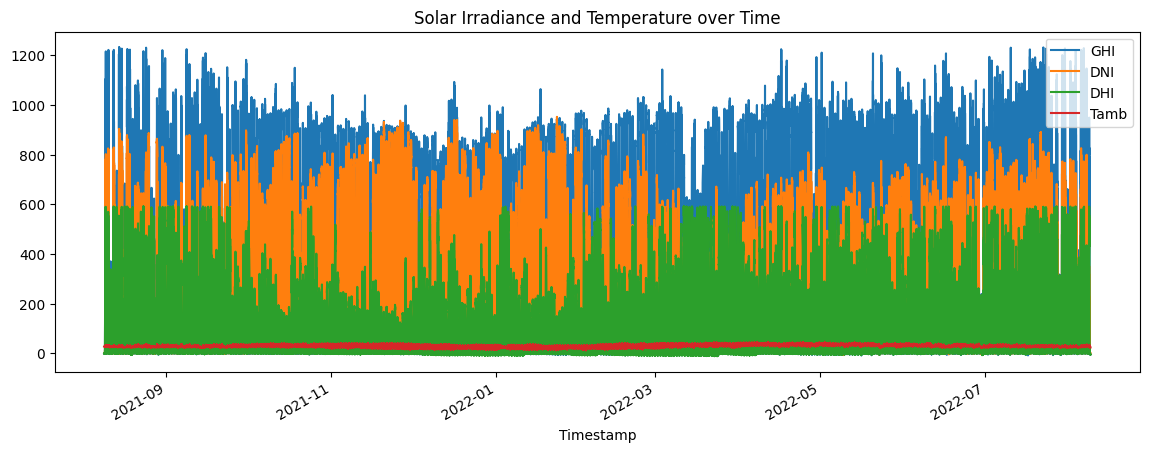

In [42]:
# Line plots
df_clean.set_index("Timestamp")[["GHI", "DNI", "DHI", "Tamb"]].plot(figsize=(14, 5))
plt.title("Solar Irradiance and Temperature over Time")
plt.show()


**Cleaning Impact **

Group by Cleaning flag and plot average ModA & ModB pre/post-clean

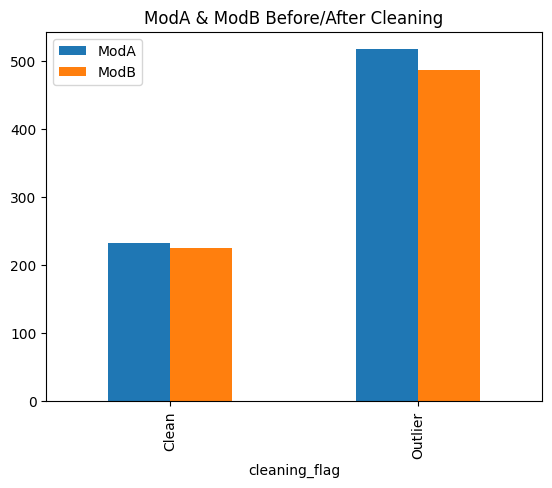

In [43]:
# Compare ModA/ModB before and after cleaning
df["cleaning_flag"] = np.where(df["outlier_flag"], "Outlier", "Clean")
df.groupby("cleaning_flag")[["ModA", "ModB"]].mean().plot(kind="bar")
plt.title("ModA & ModB Before/After Cleaning")
plt.show()


**Correlation & Relationship Analysis**

Heatmap Correlation

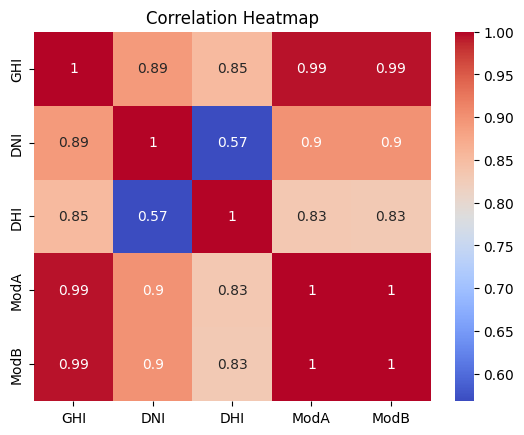

In [44]:
sns.heatmap(df_clean[["GHI", "DNI", "DHI", "ModA", "ModB"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

<Axes: xlabel='WS', ylabel='GHI'>

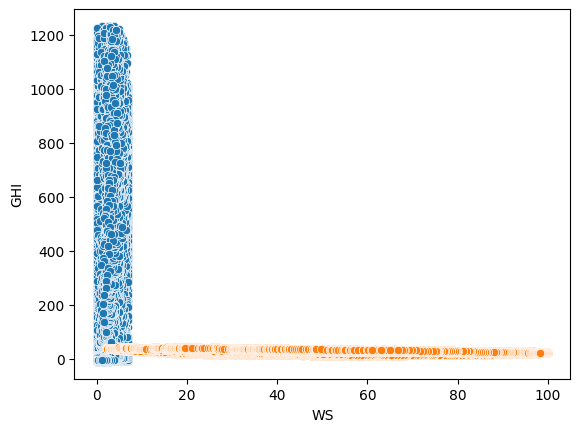

In [52]:
sns.scatterplot(x="WS", y="GHI", data=df_clean)
sns.scatterplot(x="RH", y="Tamb", data=df_clean)

Wind & Distribution Analysis

In [55]:
fig = px.scatter_polar(df_clean, r="WS", theta="WD", color="WS", size="WSgust", title="Wind Rose")
#fig.show()

Histograms for GHI and one other variable (e.g. WS).

<Axes: >

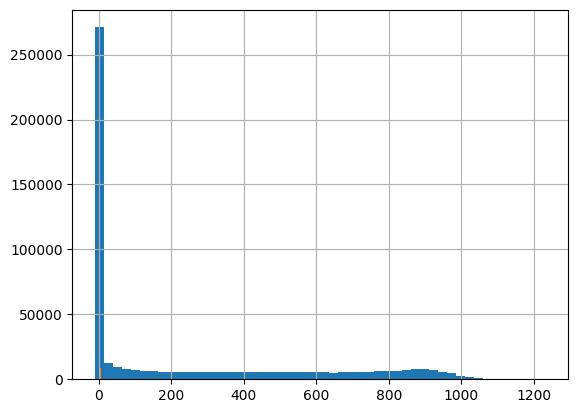

In [56]:
df_clean["GHI"].hist(bins=50)
df_clean["WS"].hist(bins=50)

Temperature Analysis

**Bubble Chart**

GHI vs. Tamb with bubble size = RH or BP

In [58]:
fig = px.scatter(df_clean, x="GHI", y="Tamb", size="RH", color="BP", title="GHI vs Tamb (Bubble: RH)")
#fig.show()